In [1]:
## visualize synthetic PRISM generation
## authors: Marianne Cowherd and Utkarsh Mital

import pickle
import warnings
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 

## set the directories in which your copies of the data are in the dirs.py file
from dirs import wrfdir, basedir, coorddir, snoteldir

## aesthetics
plt.style.use('style.mplstyle')
plt.rcParams['font.family'] = 'sans-serif'
## 
warnings.filterwarnings("ignore") # bad

/global/homes/c/cowherd/.conda/envs/fos/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
huc2 = gpd.read_file(f'{basedir}data/huc2.shp')
hucs_plot = huc2.iloc[[15,18,12,11,9,13]]
coords = xr.open_dataset(f'{coorddir}wrfinput_d02')
states = gpd.read_file(f'{basedir}/data/cb_2018_us_state_5m.shp')

lat = coords['XLAT'][0]
lon = coords['XLONG'][0]



In [3]:
# Load the dictionary containing the plots and their data
with open(f'{basedir}/data/tmp/plots_data.pkl', 'rb') as file:
    plots_dict = pickle.load(file)
for key, value in plots_dict.items():
    globals()[key] = value


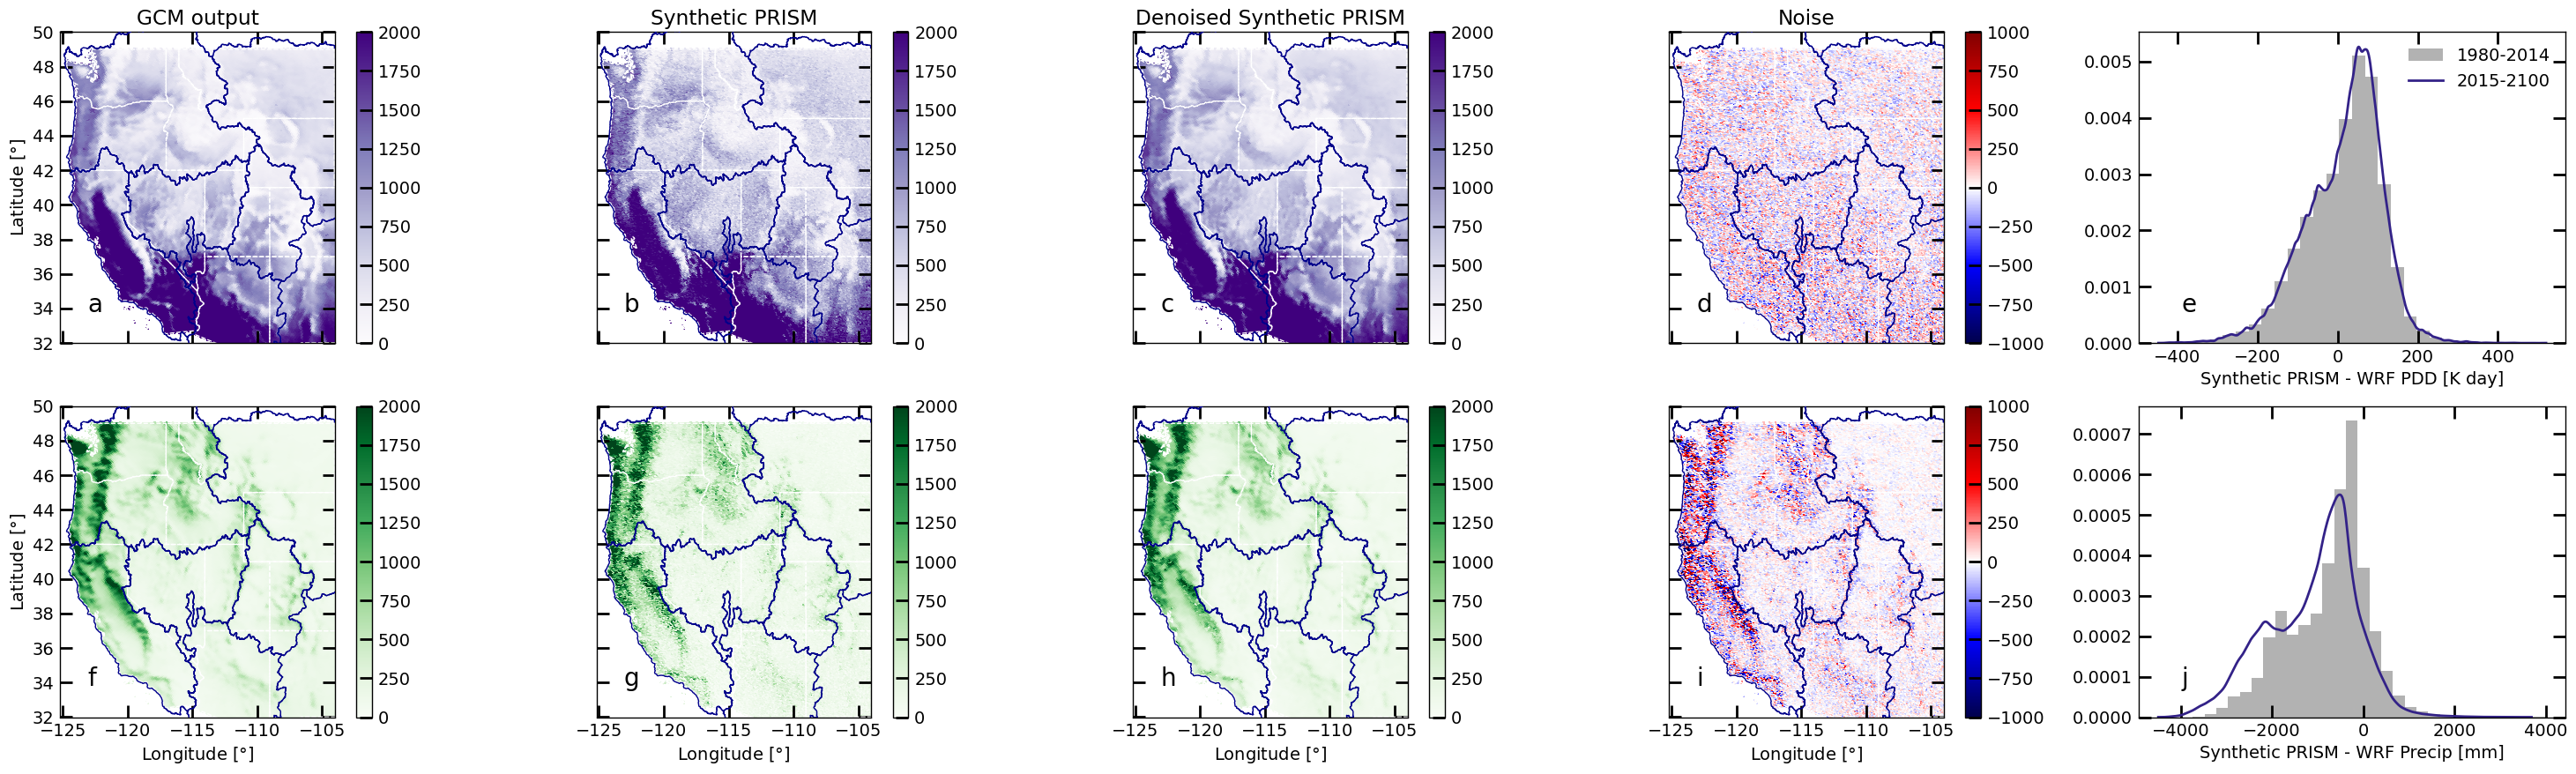

In [4]:
year = 1990
fig, ax = plt.subplots(2,5, figsize = (30,9))
cmap = 'Purples'
vmin = 0
vmax = 2000

datas = [pdd_gcm_base, synth_pdd, synth_pdd_denoised]
for j, data in enumerate(datas):
    cb = ax[0,j].pcolormesh(lon,lat, data.sel(time=year), cmap = cmap, vmin = vmin, vmax = vmax)
    plt.colorbar(cb, ax = ax[0,j])
cb = ax[0,3].pcolormesh(lon, lat, synth_pdd_denoised.sel(time = year) - synth_pdd.sel(time = year) , cmap='seismic', vmin=-1000, vmax=+1000)
plt.colorbar(cb, ax = ax[0,3])

ax[0,4].hist(pdd_hist_diff.values.flatten(), alpha = 0.3, density = True, bins = 30, label = '1980-2014')
ax[0,4].plot(x_pdd, y_pdd, label = '2015-2100')
ax[0,4].legend()
ax[0,4].set_xlabel('Synthetic PRISM - WRF PDD [K day]')

cmap = 'Greens'
vmin = 0
vmax = 2000
datas = [cpre_gcm_base, synth_cpre, synth_cpre_denoised]
for j, data in enumerate(datas):
    cb = ax[1,j].pcolormesh(lon,lat, data.sel(time=year), cmap = cmap, vmin = vmin, vmax = vmax)
    plt.colorbar(cb, ax = ax[1,j])
cb = ax[1,3].pcolormesh(lon, lat, synth_cpre_denoised.sel(time = year) - synth_cpre.sel(time = year) , cmap='seismic', vmin=-1000, vmax=+1000)
plt.colorbar(cb, ax=ax[1,3])
ax[1,4].hist(cpre_hist_diff.values.flatten(), alpha = 0.3, density = True, bins = 30, label = '1980-2014')
ax[1,4].plot(x_cpre, y_cpre, label = '2015-2100')
ax[1,4].set_xlabel('Synthetic PRISM - WRF Precip [mm]')

basincolor = 'darkblue'
## plot aesthetics
titles = ['GCM output', 'Synthetic PRISM', 'Denoised Synthetic PRISM','Noise','']
letterlabels = [['a','b','c','d','e'],['f','g','h','i','j']]
LETTERS = True
for i in [0,1]:
    for j in [0,1,2,3,4]:
        myax = ax[i,j]
        if LETTERS:
            myax.text(0.1,0.1, letterlabels[i][j], fontsize = 20, transform = myax.transAxes)
        
        if j <4:
            states.boundary.plot(ax=myax, linewidth =1, color = 'white', alpha = 1, linestyle = '--')
            hucs_plot.boundary.plot(ax=myax, linewidth = 1, color = basincolor, zorder =3 )
        
            myax.set_xlim((-125.2,-104))
            myax.set_ylim((32,50))
        if i == 0:
            myax.set_title(titles[j])
        if i == 1 and j < 4:
            myax.set_xlabel(r'Longitude [$\degree$]')
        if j in[1,2,3]:
            myax.set_yticklabels([])
        if i  == 0 and j in [0, 1,2,3]:
            myax.set_xticklabels([])
        if j == 0:
            myax.set_ylabel(r'Latitude [$\degree$]')
plt.tight_layout()

plt.show()